<a href="https://colab.research.google.com/github/amarildo86/islr-python/blob/master/Regress%C3%A3o_Linear_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
boston = load_boston()
X = boston.data
print('Número de atributos original:')
print(X.shape)

Número de atributos original:
(506, 13)


In [ ]:
# o Polynonial Features() aumenta a dimensão dos dados produzindo novos atributos
# que são combinações lineraes dos dados originais

In [ ]:
X = MinMaxScaler().fit_transform(boston.data)
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

print('Polynomial Features (atributos redundantes):')
print(X.shape)

y = boston.target

Polynomial Features (atributos redundantes):
(506, 104)


## Regressão Linear
Os passos para indução de um modelo são:

1. Instanciar o modelo: LinerRegression()
2. Treinar o modelo: fit()

O método score() retorna o coeficiente R² de predição.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print('Regressão Linear (com atributos redundantes):')
print('Acurácia na base de treinamento: {:.2f}'.format(lr.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(lr.score(X_test, y_test)))

Regressão Linear (com atributos redundantes):
Acurácia na base de treinamento: 0.95
Acurácia na base de teste: 0.61


## Ridge (regressão linear com regularização L2)

Força uma redução do valor dos coeficientes, penalizando coeficientes grandes que não contribuem significativamente para a explicação da variância dos sinais. A força da regularização é dada pelo atributo *alpha*, com valor *default* igual à 1.

In [ ]:
ridge = Ridge().fit(X_train, y_train)
print('Ridge alpha = 1')
print('Acurácia na base de treinamento: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Ridge alpha = 10')
print('Acurácia na base de treinamento: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Ridge alpha= 0.1')
print('Acurácia na base de treinamento: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(ridge01.score(X_test, y_test)))

Ridge alpha = 1
Acurácia na base de treinamento: 0.89
Acurácia na base de teste: 0.75
Ridge alpha = 10
Acurácia na base de treinamento: 0.79
Acurácia na base de teste: 0.64
Ridge alpha= 0.1
Acurácia na base de treinamento: 0.93
Acurácia na base de teste: 0.77


## Comparação da Regressão Linear e Ridge

O gráfico exibe a magnitude dos coeficientes obtidos por cada método. Pode-se observar como a regularização afeta a magnitude dos coeficientes do Ridge como um todo, mas sem zerar coeficientes de uma forma geral.

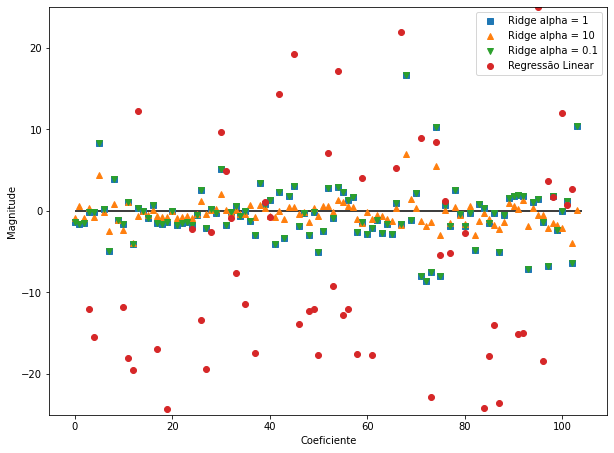

In [ ]:
plt.figure(figsize=(10, 7.5))
plt.plot(ridge.coef_, 's', label='Ridge alpha = 1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha = 10')
plt.plot(ridge.coef_, 'v', label='Ridge alpha = 0.1')
plt.plot(lr.coef_, 'o', label='Regressão Linear')
plt.xlabel('Coeficiente')
plt.ylabel('Magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

## LASSO (Regressão linear com regularização L1)

Força uma redução do valor dos coeficientes, podendo zerar diversos coeficientes cujos atributos não contribuem significativamente para a previsão. Muito utilizado no apoio á tarefa de selação de atributos - *feature selection*.

A força da regularização é dada pelo atributo *alpha*, com valor igual à 1. Alpha=0 resulta na regressão liear tradicional.

In [35]:
lasso = Lasso().fit(X_train, y_train)
print('Lasso alpha = 1')
print('Acurácia na base de treinamento: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Número de atributos usados: {}'.format(np.sum(lasso.coef_ != 0)))

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Lasso alpha = 0.01')
print('Acurácia na base de treinamento: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('Número de atributos usados: {}'.format(np.sum(lasso001.coef_ != 0)))

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Lasso alpha = 0.0001')
print('Acurácia na base de treinamento: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Número de atributos usados: {}'.format(np.sum(lasso00001.coef_ != 0)))

Lasso alpha = 1
Acurácia na base de treinamento: 0.29
Acurácia na base de teste: 0.21
Número de atributos usados: 4
Lasso alpha = 0.01
Acurácia na base de treinamento: 0.90
Acurácia na base de teste: 0.77
Número de atributos usados: 33
Lasso alpha = 0.0001
Acurácia na base de treinamento: 0.95
Acurácia na base de teste: 0.64
Número de atributos usados: 96


## Comparação da LASSO e Ridge

O gráfico exibe a magnitude dos coeficientes obtidos por cada método.

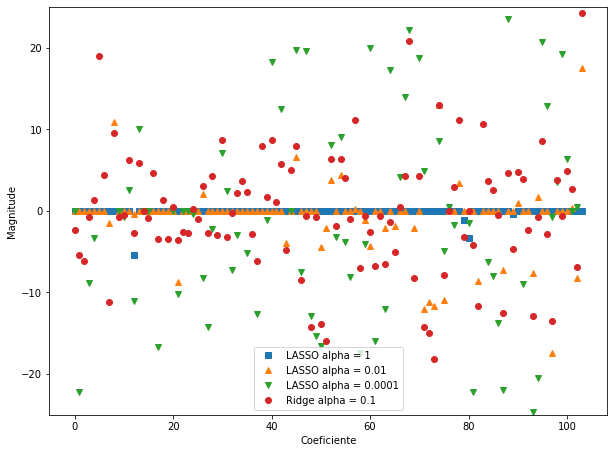

In [36]:
plt.figure(figsize=(10, 7.5))
plt.plot(lasso.coef_, 's', label='LASSO alpha = 1')
plt.plot(lasso001.coef_, '^', label='LASSO alpha = 0.01')
plt.plot(lasso00001.coef_, 'v', label='LASSO alpha = 0.0001')
plt.plot(ridge01.coef_, 'o', label='Ridge alpha = 0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('Coeficiente')
plt.ylabel('Magnitude')
plt.legend()